In [232]:
%config Completer.use_jedi = False
%config IPCompleter.greedy=True

In [233]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [234]:
apache_prd = pd.read_csv("../data/test_evaluations/evaluations/apache_predictions.csv")
open_prd = pd.read_csv("../data/test_evaluations/evaluations/openstack_predictions.csv")

In [235]:
apache_prd

,commit_id,actual,jitgnn_prob,jitline_prob,base_prob,jitgnn_prd,jitline_prd,base_prd
0,b0f422c3861a5a3831e481b8ffac08f6fa085d00,1,0.260028,0.646667,0.556848,0,1,1
1,593dffecd7bad47739a7cbd319d14bb3e911038a,0,0.288836,0.203333,0.074594,0,0,0
2,c561cb316e365ef674784cd6cf0b12c0fbc271a3,1,0.839183,0.836667,0.780543,1,1,1
3,4ebc23ba7b16c7b9acf38b5a864682a6c8890690,0,0.475002,0.630000,0.543089,0,1,1
4,dde018dc7c9fa0e4257d2aa09d2d6d306bc17ccd,0,0.206722,0.050000,0.050943,0,0,0
...,...,...,...,...,...,...,...,...
7510,66ac59f285d1bc8d8b633a0dea318af92734d689,0,0.250133,0.603333,0.375504,0,1,0
7511,10d0e4be6eade7c1685b9c6962bc9b18e33122a8,0,0.177446,0.506667,0.307733,0,1,0
7512,818569f6d0bb282eed58c14c9041670ced3905ad,1,0.871664,0.876667,0.837267,1,1,1
7513,303a7f8a39349e518e0050860a2656f6e58ee704,0,0.171901,0.040000,0.238006,0,0,0


In [236]:
bound = np.arange(0.20, 0.60, 0.01)

## Apache / JITGNN

In [237]:
y_true = apache_prd["actual"]

In [238]:
gnn_prd = apache_prd["jitgnn_prob"]
gnn_prd

0       0.260028
1       0.288836
2       0.839183
3       0.475002
4       0.206722
          ...   
7510    0.250133
7511    0.177446
7512    0.871664
7513    0.171901
7514    0.969287
Name: jitgnn_prob, Length: 7515, dtype: float64

In [239]:
from sklearn.metrics import matthews_corrcoef

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    print('at {:3.2f} threshold, matthews corrcoef={:.2f}'.format(b, matthews_corrcoef(y_true, pred)))

at 0.20 threshold, matthews corrcoef=0.22
at 0.21 threshold, matthews corrcoef=0.24
at 0.22 threshold, matthews corrcoef=0.26
at 0.23 threshold, matthews corrcoef=0.27
at 0.24 threshold, matthews corrcoef=0.28
at 0.25 threshold, matthews corrcoef=0.28
at 0.26 threshold, matthews corrcoef=0.29
at 0.27 threshold, matthews corrcoef=0.29
at 0.28 threshold, matthews corrcoef=0.29
at 0.29 threshold, matthews corrcoef=0.30
at 0.30 threshold, matthews corrcoef=0.30
at 0.31 threshold, matthews corrcoef=0.31
at 0.32 threshold, matthews corrcoef=0.30
at 0.33 threshold, matthews corrcoef=0.31
at 0.34 threshold, matthews corrcoef=0.32
at 0.35 threshold, matthews corrcoef=0.32
at 0.36 threshold, matthews corrcoef=0.33
at 0.37 threshold, matthews corrcoef=0.34
at 0.38 threshold, matthews corrcoef=0.34
at 0.39 threshold, matthews corrcoef=0.34
at 0.40 threshold, matthews corrcoef=0.35
at 0.41 threshold, matthews corrcoef=0.35
at 0.42 threshold, matthews corrcoef=0.35
at 0.43 threshold, matthews corrco

In [240]:
roc_auc_score(y_true, gnn_prd)

0.8087744991512827

In [241]:
precisions = []
recalls = []

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary')
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.24, r=0.95, f1=0.39
at 0.21 threshold, p=0.25, r=0.94, f1=0.40
at 0.22 threshold, p=0.26, r=0.93, f1=0.41
at 0.23 threshold, p=0.27, r=0.93, f1=0.41
at 0.24 threshold, p=0.27, r=0.93, f1=0.42
at 0.25 threshold, p=0.27, r=0.92, f1=0.42
at 0.26 threshold, p=0.28, r=0.92, f1=0.42
at 0.27 threshold, p=0.28, r=0.91, f1=0.43
at 0.28 threshold, p=0.28, r=0.91, f1=0.43
at 0.29 threshold, p=0.29, r=0.90, f1=0.43
at 0.30 threshold, p=0.29, r=0.90, f1=0.44
at 0.31 threshold, p=0.29, r=0.89, f1=0.44
at 0.32 threshold, p=0.29, r=0.88, f1=0.44
at 0.33 threshold, p=0.30, r=0.88, f1=0.44
at 0.34 threshold, p=0.30, r=0.88, f1=0.45
at 0.35 threshold, p=0.31, r=0.87, f1=0.45
at 0.36 threshold, p=0.31, r=0.87, f1=0.46
at 0.37 threshold, p=0.32, r=0.87, f1=0.47
at 0.38 threshold, p=0.32, r=0.86, f1=0.47
at 0.39 threshold, p=0.33, r=0.86, f1=0.47
at 0.40 threshold, p=0.33, r=0.85, f1=0.48
at 0.41 threshold, p=0.33, r=0.85, f1=0.48
at 0.42 threshold, p=0.34, r=0.84, f1=0.48
at 0.43 thr

In [242]:
# for negative class (clean commits)



for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary', pos_label=0)
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.96, r=0.30, f1=0.46
at 0.21 threshold, p=0.96, r=0.35, f1=0.51
at 0.22 threshold, p=0.96, r=0.38, f1=0.54
at 0.23 threshold, p=0.96, r=0.40, f1=0.56
at 0.24 threshold, p=0.96, r=0.41, f1=0.57
at 0.25 threshold, p=0.96, r=0.42, f1=0.58
at 0.26 threshold, p=0.96, r=0.43, f1=0.59
at 0.27 threshold, p=0.96, r=0.44, f1=0.61
at 0.28 threshold, p=0.95, r=0.45, f1=0.62
at 0.29 threshold, p=0.95, r=0.47, f1=0.63
at 0.30 threshold, p=0.95, r=0.48, f1=0.64
at 0.31 threshold, p=0.95, r=0.49, f1=0.65
at 0.32 threshold, p=0.95, r=0.50, f1=0.65
at 0.33 threshold, p=0.95, r=0.51, f1=0.66
at 0.34 threshold, p=0.95, r=0.52, f1=0.67
at 0.35 threshold, p=0.95, r=0.54, f1=0.68
at 0.36 threshold, p=0.95, r=0.55, f1=0.69
at 0.37 threshold, p=0.95, r=0.56, f1=0.70
at 0.38 threshold, p=0.95, r=0.57, f1=0.71
at 0.39 threshold, p=0.95, r=0.58, f1=0.72
at 0.40 threshold, p=0.94, r=0.59, f1=0.73
at 0.41 threshold, p=0.94, r=0.60, f1=0.73
at 0.42 threshold, p=0.94, r=0.61, f1=0.74
at 0.43 thr

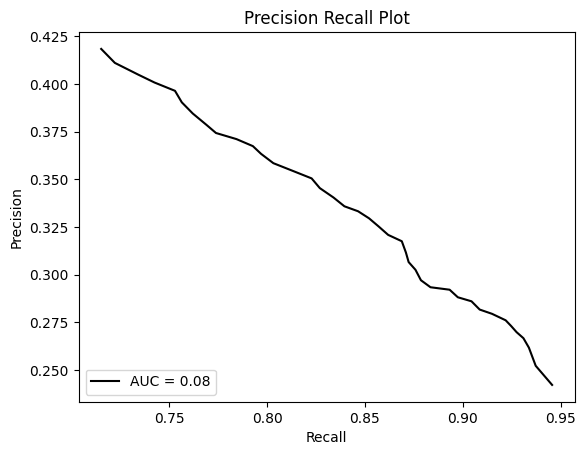

In [172]:
plt.clf()
plt.title('Precision Recall Plot')
plt.plot(recalls, precisions, 'black', label='AUC = %0.2f' % metrics.auc(recalls, precisions))
plt.legend(loc='lower left')
# plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig("figures/apache_gnn_pr.png", dpi=500)

## Apache / JITLine

In [243]:
y_true = apache_prd["actual"]

In [244]:
gnn_prd = apache_prd["jitline_prob"]
gnn_prd

0       0.646667
1       0.203333
2       0.836667
3       0.630000
4       0.050000
          ...   
7510    0.603333
7511    0.506667
7512    0.876667
7513    0.040000
7514    0.890000
Name: jitline_prob, Length: 7515, dtype: float64

In [245]:
from sklearn.metrics import matthews_corrcoef

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    print('at {:3.2f} threshold, matthews corrcoef={:.2f}'.format(b, matthews_corrcoef(y_true, pred)))

at 0.20 threshold, matthews corrcoef=0.23
at 0.21 threshold, matthews corrcoef=0.24
at 0.22 threshold, matthews corrcoef=0.24
at 0.23 threshold, matthews corrcoef=0.25
at 0.24 threshold, matthews corrcoef=0.26
at 0.25 threshold, matthews corrcoef=0.26
at 0.26 threshold, matthews corrcoef=0.26
at 0.27 threshold, matthews corrcoef=0.27
at 0.28 threshold, matthews corrcoef=0.28
at 0.29 threshold, matthews corrcoef=0.28
at 0.30 threshold, matthews corrcoef=0.29
at 0.31 threshold, matthews corrcoef=0.29
at 0.32 threshold, matthews corrcoef=0.30
at 0.33 threshold, matthews corrcoef=0.30
at 0.34 threshold, matthews corrcoef=0.31
at 0.35 threshold, matthews corrcoef=0.31
at 0.36 threshold, matthews corrcoef=0.32
at 0.37 threshold, matthews corrcoef=0.32
at 0.38 threshold, matthews corrcoef=0.33
at 0.39 threshold, matthews corrcoef=0.34
at 0.40 threshold, matthews corrcoef=0.34
at 0.41 threshold, matthews corrcoef=0.34
at 0.42 threshold, matthews corrcoef=0.34
at 0.43 threshold, matthews corrco

In [246]:
roc_auc_score(y_true, gnn_prd)

0.811151526945194

In [247]:
precisions = []
recalls = []

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary')
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.24, r=0.97, f1=0.39
at 0.21 threshold, p=0.25, r=0.96, f1=0.39
at 0.22 threshold, p=0.25, r=0.96, f1=0.39
at 0.23 threshold, p=0.25, r=0.95, f1=0.40
at 0.24 threshold, p=0.26, r=0.95, f1=0.40
at 0.25 threshold, p=0.26, r=0.94, f1=0.41
at 0.26 threshold, p=0.26, r=0.93, f1=0.41
at 0.27 threshold, p=0.27, r=0.93, f1=0.41
at 0.28 threshold, p=0.27, r=0.93, f1=0.42
at 0.29 threshold, p=0.27, r=0.93, f1=0.42
at 0.30 threshold, p=0.28, r=0.92, f1=0.43
at 0.31 threshold, p=0.28, r=0.91, f1=0.43
at 0.32 threshold, p=0.28, r=0.91, f1=0.43
at 0.33 threshold, p=0.29, r=0.91, f1=0.44
at 0.34 threshold, p=0.29, r=0.90, f1=0.44
at 0.35 threshold, p=0.30, r=0.90, f1=0.45
at 0.36 threshold, p=0.30, r=0.89, f1=0.45
at 0.37 threshold, p=0.30, r=0.89, f1=0.45
at 0.38 threshold, p=0.31, r=0.88, f1=0.46
at 0.39 threshold, p=0.31, r=0.88, f1=0.46
at 0.40 threshold, p=0.32, r=0.88, f1=0.47
at 0.41 threshold, p=0.32, r=0.87, f1=0.47
at 0.42 threshold, p=0.32, r=0.86, f1=0.47
at 0.43 thr

In [248]:
# for negative class (clean commits)



for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary', pos_label=0)
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.97, r=0.28, f1=0.44
at 0.21 threshold, p=0.97, r=0.31, f1=0.46
at 0.22 threshold, p=0.97, r=0.32, f1=0.48
at 0.23 threshold, p=0.97, r=0.34, f1=0.50
at 0.24 threshold, p=0.96, r=0.35, f1=0.52
at 0.25 threshold, p=0.96, r=0.37, f1=0.53
at 0.26 threshold, p=0.96, r=0.38, f1=0.54
at 0.27 threshold, p=0.96, r=0.39, f1=0.56
at 0.28 threshold, p=0.96, r=0.41, f1=0.57
at 0.29 threshold, p=0.96, r=0.42, f1=0.59
at 0.30 threshold, p=0.96, r=0.43, f1=0.60
at 0.31 threshold, p=0.96, r=0.45, f1=0.61
at 0.32 threshold, p=0.96, r=0.46, f1=0.62
at 0.33 threshold, p=0.95, r=0.47, f1=0.63
at 0.34 threshold, p=0.96, r=0.49, f1=0.64
at 0.35 threshold, p=0.95, r=0.50, f1=0.66
at 0.36 threshold, p=0.95, r=0.51, f1=0.67
at 0.37 threshold, p=0.95, r=0.52, f1=0.67
at 0.38 threshold, p=0.95, r=0.53, f1=0.68
at 0.39 threshold, p=0.95, r=0.55, f1=0.69
at 0.40 threshold, p=0.95, r=0.56, f1=0.70
at 0.41 threshold, p=0.95, r=0.57, f1=0.71
at 0.42 threshold, p=0.95, r=0.57, f1=0.71
at 0.43 thr

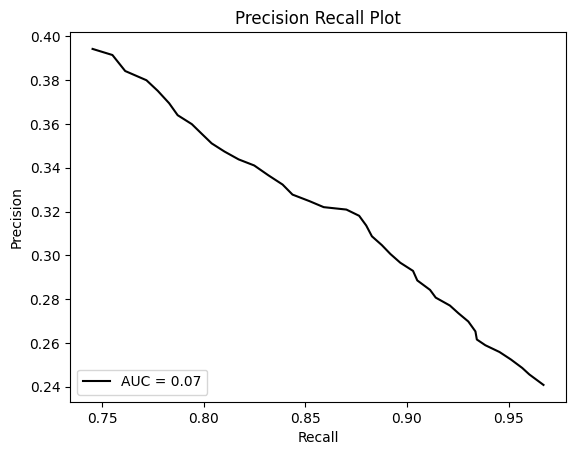

In [179]:
plt.clf()
plt.title('Precision Recall Plot')
plt.plot(recalls, precisions, 'black', label='AUC = %0.2f' % metrics.auc(recalls, precisions))
plt.legend(loc='lower left')
# plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig("figures/apache_line_pr.png", dpi=500)

## Apache / Baseline

In [249]:
y_true = apache_prd["actual"]

In [250]:
gnn_prd = apache_prd["base_prob"]
gnn_prd

0       0.556848
1       0.074594
2       0.780543
3       0.543089
4       0.050943
          ...   
7510    0.375504
7511    0.307733
7512    0.837267
7513    0.238006
7514    0.968710
Name: base_prob, Length: 7515, dtype: float64

In [252]:
from sklearn.metrics import matthews_corrcoef

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    print('at {:3.2f} threshold, matthews corrcoef={:.2f}'.format(b, matthews_corrcoef(y_true, pred)))

at 0.20 threshold, matthews corrcoef=0.17
at 0.21 threshold, matthews corrcoef=0.18
at 0.22 threshold, matthews corrcoef=0.20
at 0.23 threshold, matthews corrcoef=0.21
at 0.24 threshold, matthews corrcoef=0.22
at 0.25 threshold, matthews corrcoef=0.23
at 0.26 threshold, matthews corrcoef=0.24
at 0.27 threshold, matthews corrcoef=0.25
at 0.28 threshold, matthews corrcoef=0.27
at 0.29 threshold, matthews corrcoef=0.27
at 0.30 threshold, matthews corrcoef=0.28
at 0.31 threshold, matthews corrcoef=0.29
at 0.32 threshold, matthews corrcoef=0.30
at 0.33 threshold, matthews corrcoef=0.31
at 0.34 threshold, matthews corrcoef=0.31
at 0.35 threshold, matthews corrcoef=0.32
at 0.36 threshold, matthews corrcoef=0.32
at 0.37 threshold, matthews corrcoef=0.33
at 0.38 threshold, matthews corrcoef=0.33
at 0.39 threshold, matthews corrcoef=0.34
at 0.40 threshold, matthews corrcoef=0.34
at 0.41 threshold, matthews corrcoef=0.35
at 0.42 threshold, matthews corrcoef=0.35
at 0.43 threshold, matthews corrco

In [253]:
roc_auc_score(y_true, gnn_prd)

0.7971320884868874

In [257]:
precisions = []
recalls = []

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary')
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.22, r=0.99, f1=0.35
at 0.21 threshold, p=0.22, r=0.99, f1=0.36
at 0.22 threshold, p=0.23, r=0.98, f1=0.37
at 0.23 threshold, p=0.23, r=0.98, f1=0.37
at 0.24 threshold, p=0.24, r=0.97, f1=0.38
at 0.25 threshold, p=0.24, r=0.96, f1=0.39
at 0.26 threshold, p=0.25, r=0.95, f1=0.39
at 0.27 threshold, p=0.26, r=0.94, f1=0.40
at 0.28 threshold, p=0.26, r=0.93, f1=0.41
at 0.29 threshold, p=0.27, r=0.92, f1=0.42
at 0.30 threshold, p=0.27, r=0.91, f1=0.42
at 0.31 threshold, p=0.28, r=0.91, f1=0.43
at 0.32 threshold, p=0.29, r=0.90, f1=0.43
at 0.33 threshold, p=0.29, r=0.89, f1=0.44
at 0.34 threshold, p=0.30, r=0.89, f1=0.45
at 0.35 threshold, p=0.30, r=0.88, f1=0.45
at 0.36 threshold, p=0.31, r=0.87, f1=0.45
at 0.37 threshold, p=0.31, r=0.87, f1=0.46
at 0.38 threshold, p=0.32, r=0.86, f1=0.46
at 0.39 threshold, p=0.32, r=0.85, f1=0.47
at 0.40 threshold, p=0.33, r=0.85, f1=0.47
at 0.41 threshold, p=0.33, r=0.84, f1=0.48
at 0.42 threshold, p=0.34, r=0.83, f1=0.48
at 0.43 thr

In [255]:
# for negative class (clean commits)



for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary', pos_label=0)
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.98, r=0.15, f1=0.26
at 0.21 threshold, p=0.98, r=0.18, f1=0.30
at 0.22 threshold, p=0.98, r=0.20, f1=0.34
at 0.23 threshold, p=0.98, r=0.23, f1=0.38
at 0.24 threshold, p=0.97, r=0.27, f1=0.42
at 0.25 threshold, p=0.97, r=0.30, f1=0.46
at 0.26 threshold, p=0.96, r=0.33, f1=0.49
at 0.27 threshold, p=0.96, r=0.36, f1=0.52
at 0.28 threshold, p=0.96, r=0.38, f1=0.55
at 0.29 threshold, p=0.96, r=0.41, f1=0.57
at 0.30 threshold, p=0.95, r=0.43, f1=0.59
at 0.31 threshold, p=0.95, r=0.45, f1=0.61
at 0.32 threshold, p=0.95, r=0.47, f1=0.63
at 0.33 threshold, p=0.95, r=0.49, f1=0.65
at 0.34 threshold, p=0.95, r=0.50, f1=0.66
at 0.35 threshold, p=0.95, r=0.52, f1=0.67
at 0.36 threshold, p=0.95, r=0.53, f1=0.68
at 0.37 threshold, p=0.95, r=0.55, f1=0.70
at 0.38 threshold, p=0.94, r=0.56, f1=0.71
at 0.39 threshold, p=0.94, r=0.58, f1=0.72
at 0.40 threshold, p=0.94, r=0.59, f1=0.73
at 0.41 threshold, p=0.94, r=0.60, f1=0.73
at 0.42 threshold, p=0.94, r=0.61, f1=0.74
at 0.43 thr

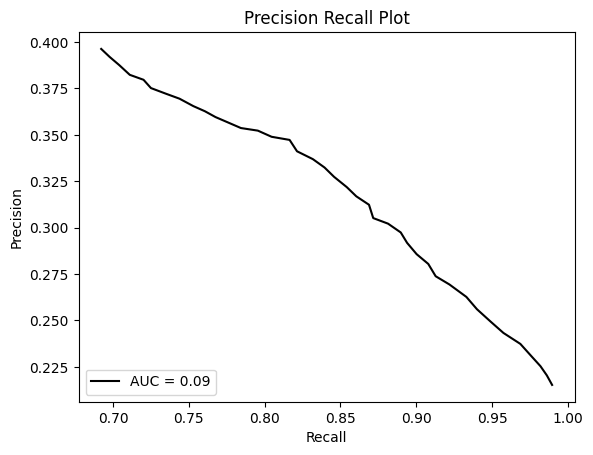

In [258]:
plt.clf()
plt.title('Precision Recall Plot')
plt.plot(recalls, precisions, 'black', label='AUC = %0.2f' % metrics.auc(recalls, precisions))
plt.legend(loc='lower left')
# plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig("figures/apache_base_pr.png", dpi=500)

## Openstack / JITGNN

In [259]:
y_true = open_prd["actual"]

In [260]:
gnn_prd = open_prd["jitgnn_prob"]
gnn_prd

0       0.051450
1       0.228226
2       0.039715
3       0.145492
4       0.032898
          ...   
1027    0.550119
1028    0.114543
1029    0.040225
1030    0.055959
1031    0.246192
Name: jitgnn_prob, Length: 1032, dtype: float64

In [261]:
from sklearn.metrics import matthews_corrcoef

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    print('at {:3.2f} threshold, matthews corrcoef={:.2f}'.format(b, matthews_corrcoef(y_true, pred)))

at 0.20 threshold, matthews corrcoef=0.35
at 0.21 threshold, matthews corrcoef=0.37
at 0.22 threshold, matthews corrcoef=0.38
at 0.23 threshold, matthews corrcoef=0.37
at 0.24 threshold, matthews corrcoef=0.35
at 0.25 threshold, matthews corrcoef=0.35
at 0.26 threshold, matthews corrcoef=0.35
at 0.27 threshold, matthews corrcoef=0.36
at 0.28 threshold, matthews corrcoef=0.35
at 0.29 threshold, matthews corrcoef=0.34
at 0.30 threshold, matthews corrcoef=0.35
at 0.31 threshold, matthews corrcoef=0.35
at 0.32 threshold, matthews corrcoef=0.34
at 0.33 threshold, matthews corrcoef=0.32
at 0.34 threshold, matthews corrcoef=0.31
at 0.35 threshold, matthews corrcoef=0.31
at 0.36 threshold, matthews corrcoef=0.31
at 0.37 threshold, matthews corrcoef=0.29
at 0.38 threshold, matthews corrcoef=0.29
at 0.39 threshold, matthews corrcoef=0.28
at 0.40 threshold, matthews corrcoef=0.26
at 0.41 threshold, matthews corrcoef=0.25
at 0.42 threshold, matthews corrcoef=0.25
at 0.43 threshold, matthews corrco

In [262]:
roc_auc_score(y_true, gnn_prd)

0.7904489727667273

In [263]:
precisions = []
recalls = []

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary')
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.34, r=0.67, f1=0.45
at 0.21 threshold, p=0.36, r=0.67, f1=0.47
at 0.22 threshold, p=0.37, r=0.66, f1=0.48
at 0.23 threshold, p=0.38, r=0.63, f1=0.47
at 0.24 threshold, p=0.37, r=0.59, f1=0.45
at 0.25 threshold, p=0.38, r=0.58, f1=0.46
at 0.26 threshold, p=0.38, r=0.56, f1=0.46
at 0.27 threshold, p=0.40, r=0.56, f1=0.46
at 0.28 threshold, p=0.40, r=0.54, f1=0.46
at 0.29 threshold, p=0.39, r=0.50, f1=0.44
at 0.30 threshold, p=0.41, r=0.50, f1=0.45
at 0.31 threshold, p=0.42, r=0.50, f1=0.45
at 0.32 threshold, p=0.41, r=0.48, f1=0.44
at 0.33 threshold, p=0.41, r=0.45, f1=0.43
at 0.34 threshold, p=0.40, r=0.43, f1=0.41
at 0.35 threshold, p=0.40, r=0.42, f1=0.41
at 0.36 threshold, p=0.41, r=0.40, f1=0.41
at 0.37 threshold, p=0.40, r=0.38, f1=0.39
at 0.38 threshold, p=0.40, r=0.38, f1=0.39
at 0.39 threshold, p=0.40, r=0.37, f1=0.38
at 0.40 threshold, p=0.38, r=0.34, f1=0.36
at 0.41 threshold, p=0.38, r=0.33, f1=0.35
at 0.42 threshold, p=0.38, r=0.33, f1=0.35
at 0.43 thr

In [264]:
# for negative class (clean commits)



for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary', pos_label=0)
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.93, r=0.78, f1=0.85
at 0.21 threshold, p=0.93, r=0.80, f1=0.86
at 0.22 threshold, p=0.93, r=0.81, f1=0.87
at 0.23 threshold, p=0.93, r=0.82, f1=0.87
at 0.24 threshold, p=0.92, r=0.83, f1=0.87
at 0.25 threshold, p=0.92, r=0.84, f1=0.88
at 0.26 threshold, p=0.92, r=0.85, f1=0.88
at 0.27 threshold, p=0.92, r=0.86, f1=0.89
at 0.28 threshold, p=0.92, r=0.86, f1=0.89
at 0.29 threshold, p=0.91, r=0.87, f1=0.89
at 0.30 threshold, p=0.91, r=0.88, f1=0.89
at 0.31 threshold, p=0.91, r=0.88, f1=0.90
at 0.32 threshold, p=0.91, r=0.88, f1=0.90
at 0.33 threshold, p=0.91, r=0.89, f1=0.90
at 0.34 threshold, p=0.90, r=0.89, f1=0.90
at 0.35 threshold, p=0.90, r=0.89, f1=0.90
at 0.36 threshold, p=0.90, r=0.90, f1=0.90
at 0.37 threshold, p=0.90, r=0.90, f1=0.90
at 0.38 threshold, p=0.90, r=0.90, f1=0.90
at 0.39 threshold, p=0.89, r=0.90, f1=0.90
at 0.40 threshold, p=0.89, r=0.91, f1=0.90
at 0.41 threshold, p=0.89, r=0.91, f1=0.90
at 0.42 threshold, p=0.89, r=0.91, f1=0.90
at 0.43 thr

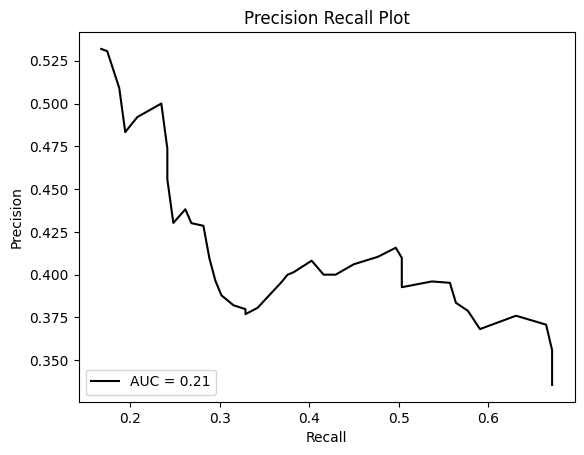

In [204]:
plt.clf()
plt.title('Precision Recall Plot')
plt.plot(recalls, precisions, 'black', label='AUC = %0.2f' % metrics.auc(recalls, precisions))
plt.legend(loc='lower left')
# plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig("figures/open_gnn_pr.png", dpi=500)

## Openstack / JITLine

In [265]:
y_true = open_prd["actual"]

In [266]:
gnn_prd = open_prd["jitline_prob"]
gnn_prd

0       0.076667
1       0.070000
2       0.020000
3       0.023333
4       0.070000
          ...   
1027    0.423333
1028    0.100000
1029    0.150000
1030    0.016667
1031    0.516667
Name: jitline_prob, Length: 1032, dtype: float64

In [267]:
from sklearn.metrics import matthews_corrcoef

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    print('at {:3.2f} threshold, matthews corrcoef={:.2f}'.format(b, matthews_corrcoef(y_true, pred)))

at 0.20 threshold, matthews corrcoef=0.34
at 0.21 threshold, matthews corrcoef=0.34
at 0.22 threshold, matthews corrcoef=0.34
at 0.23 threshold, matthews corrcoef=0.34
at 0.24 threshold, matthews corrcoef=0.34
at 0.25 threshold, matthews corrcoef=0.32
at 0.26 threshold, matthews corrcoef=0.32
at 0.27 threshold, matthews corrcoef=0.31
at 0.28 threshold, matthews corrcoef=0.32
at 0.29 threshold, matthews corrcoef=0.33
at 0.30 threshold, matthews corrcoef=0.34
at 0.31 threshold, matthews corrcoef=0.34
at 0.32 threshold, matthews corrcoef=0.33
at 0.33 threshold, matthews corrcoef=0.34
at 0.34 threshold, matthews corrcoef=0.33
at 0.35 threshold, matthews corrcoef=0.31
at 0.36 threshold, matthews corrcoef=0.31
at 0.37 threshold, matthews corrcoef=0.32
at 0.38 threshold, matthews corrcoef=0.32
at 0.39 threshold, matthews corrcoef=0.30
at 0.40 threshold, matthews corrcoef=0.29
at 0.41 threshold, matthews corrcoef=0.29
at 0.42 threshold, matthews corrcoef=0.30
at 0.43 threshold, matthews corrco

In [268]:
roc_auc_score(y_true, gnn_prd)

0.7890542461255482

In [269]:
precisions = []
recalls = []

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary')
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.31, r=0.75, f1=0.44
at 0.21 threshold, p=0.31, r=0.73, f1=0.44
at 0.22 threshold, p=0.32, r=0.72, f1=0.44
at 0.23 threshold, p=0.32, r=0.70, f1=0.44
at 0.24 threshold, p=0.32, r=0.68, f1=0.44
at 0.25 threshold, p=0.32, r=0.64, f1=0.43
at 0.26 threshold, p=0.32, r=0.64, f1=0.43
at 0.27 threshold, p=0.32, r=0.60, f1=0.42
at 0.28 threshold, p=0.33, r=0.60, f1=0.43
at 0.29 threshold, p=0.35, r=0.60, f1=0.44
at 0.30 threshold, p=0.36, r=0.58, f1=0.44
at 0.31 threshold, p=0.36, r=0.58, f1=0.45
at 0.32 threshold, p=0.37, r=0.56, f1=0.44
at 0.33 threshold, p=0.38, r=0.55, f1=0.45
at 0.34 threshold, p=0.37, r=0.53, f1=0.44
at 0.35 threshold, p=0.36, r=0.49, f1=0.42
at 0.36 threshold, p=0.38, r=0.48, f1=0.42
at 0.37 threshold, p=0.38, r=0.48, f1=0.42
at 0.38 threshold, p=0.39, r=0.47, f1=0.43
at 0.39 threshold, p=0.38, r=0.44, f1=0.41
at 0.40 threshold, p=0.38, r=0.42, f1=0.40
at 0.41 threshold, p=0.39, r=0.41, f1=0.40
at 0.42 threshold, p=0.39, r=0.41, f1=0.40
at 0.43 thr

In [270]:
# for negative class (clean commits)



for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary', pos_label=0)
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.94, r=0.71, f1=0.81
at 0.21 threshold, p=0.94, r=0.73, f1=0.82
at 0.22 threshold, p=0.94, r=0.74, f1=0.83
at 0.23 threshold, p=0.94, r=0.75, f1=0.83
at 0.24 threshold, p=0.93, r=0.76, f1=0.84
at 0.25 threshold, p=0.93, r=0.77, f1=0.84
at 0.26 threshold, p=0.93, r=0.78, f1=0.84
at 0.27 threshold, p=0.92, r=0.79, f1=0.85
at 0.28 threshold, p=0.92, r=0.80, f1=0.86
at 0.29 threshold, p=0.92, r=0.81, f1=0.86
at 0.30 threshold, p=0.92, r=0.82, f1=0.87
at 0.31 threshold, p=0.92, r=0.83, f1=0.87
at 0.32 threshold, p=0.92, r=0.84, f1=0.88
at 0.33 threshold, p=0.92, r=0.85, f1=0.88
at 0.34 threshold, p=0.91, r=0.85, f1=0.88
at 0.35 threshold, p=0.91, r=0.86, f1=0.88
at 0.36 threshold, p=0.91, r=0.87, f1=0.89
at 0.37 threshold, p=0.91, r=0.87, f1=0.89
at 0.38 threshold, p=0.91, r=0.88, f1=0.89
at 0.39 threshold, p=0.90, r=0.88, f1=0.89
at 0.40 threshold, p=0.90, r=0.88, f1=0.89
at 0.41 threshold, p=0.90, r=0.89, f1=0.89
at 0.42 threshold, p=0.90, r=0.89, f1=0.90
at 0.43 thr

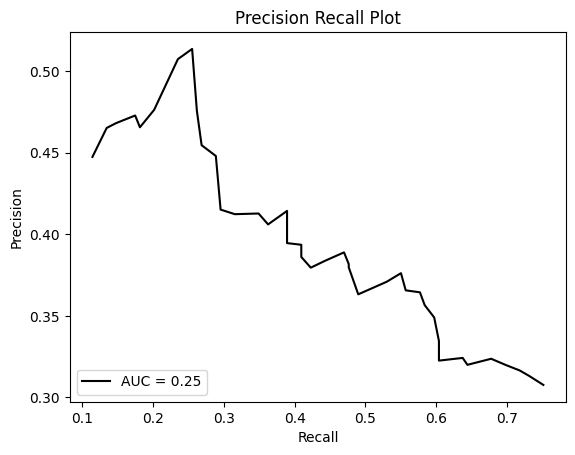

In [213]:
plt.clf()
plt.title('Precision Recall Plot')
plt.plot(recalls, precisions, 'black', label='AUC = %0.2f' % metrics.auc(recalls, precisions))
plt.legend(loc='lower left')
# plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig("figures/open_line_pr.png", dpi=500)

## Openstack / Baseline

In [271]:
y_true = open_prd["actual"]

In [272]:
gnn_prd = open_prd["base_prob"]
gnn_prd

0       0.062904
1       0.037161
2       0.031213
3       0.057533
4       0.047179
          ...   
1027    0.223519
1028    0.251038
1029    0.042886
1030    0.059626
1031    0.273621
Name: base_prob, Length: 1032, dtype: float64

In [274]:
from sklearn.metrics import matthews_corrcoef

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    print('at {:3.2f} threshold, matthews corrcoef={:.2f}'.format(b, matthews_corrcoef(y_true, pred)))

at 0.20 threshold, matthews corrcoef=0.31
at 0.21 threshold, matthews corrcoef=0.31
at 0.22 threshold, matthews corrcoef=0.32
at 0.23 threshold, matthews corrcoef=0.30
at 0.24 threshold, matthews corrcoef=0.29
at 0.25 threshold, matthews corrcoef=0.28
at 0.26 threshold, matthews corrcoef=0.27
at 0.27 threshold, matthews corrcoef=0.27
at 0.28 threshold, matthews corrcoef=0.27
at 0.29 threshold, matthews corrcoef=0.25
at 0.30 threshold, matthews corrcoef=0.25
at 0.31 threshold, matthews corrcoef=0.25
at 0.32 threshold, matthews corrcoef=0.24
at 0.33 threshold, matthews corrcoef=0.24
at 0.34 threshold, matthews corrcoef=0.21
at 0.35 threshold, matthews corrcoef=0.20
at 0.36 threshold, matthews corrcoef=0.20
at 0.37 threshold, matthews corrcoef=0.18
at 0.38 threshold, matthews corrcoef=0.17
at 0.39 threshold, matthews corrcoef=0.15
at 0.40 threshold, matthews corrcoef=0.13
at 0.41 threshold, matthews corrcoef=0.10
at 0.42 threshold, matthews corrcoef=0.08
at 0.43 threshold, matthews corrco

In [275]:
roc_auc_score(y_true, gnn_prd)

0.7829546922860596

In [276]:
precisions = []
recalls = []

for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary')
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.32, r=0.62, f1=0.42
at 0.21 threshold, p=0.32, r=0.61, f1=0.42
at 0.22 threshold, p=0.33, r=0.60, f1=0.43
at 0.23 threshold, p=0.33, r=0.58, f1=0.42
at 0.24 threshold, p=0.33, r=0.54, f1=0.41
at 0.25 threshold, p=0.32, r=0.52, f1=0.40
at 0.26 threshold, p=0.32, r=0.49, f1=0.39
at 0.27 threshold, p=0.33, r=0.48, f1=0.39
at 0.28 threshold, p=0.33, r=0.47, f1=0.39
at 0.29 threshold, p=0.33, r=0.44, f1=0.37
at 0.30 threshold, p=0.33, r=0.42, f1=0.37
at 0.31 threshold, p=0.34, r=0.41, f1=0.37
at 0.32 threshold, p=0.33, r=0.40, f1=0.36
at 0.33 threshold, p=0.34, r=0.37, f1=0.35
at 0.34 threshold, p=0.32, r=0.34, f1=0.33
at 0.35 threshold, p=0.32, r=0.32, f1=0.32
at 0.36 threshold, p=0.32, r=0.30, f1=0.31
at 0.37 threshold, p=0.31, r=0.27, f1=0.29
at 0.38 threshold, p=0.31, r=0.24, f1=0.27
at 0.39 threshold, p=0.30, r=0.21, f1=0.25
at 0.40 threshold, p=0.29, r=0.19, f1=0.23
at 0.41 threshold, p=0.27, r=0.15, f1=0.19
at 0.42 threshold, p=0.25, r=0.11, f1=0.15
at 0.43 thr

/Users/hossein/Documents/Thesis/jit-bugpred/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hossein/Documents/Thesis/jit-bugpred/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/hossein/Documents/Thesis/jit-bugpred/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [277]:
# for negative class (clean commits)



for b in bound:
    pred = [1 if prob >= b else 0 for prob in gnn_prd]
    p, r, f1, _ = precision_recall_fscore_support(y_true, pred, average='binary', pos_label=0)
    precisions.append(p)
    recalls.append(r)
    print('at {:3.2f} threshold, p={:.2f}, r={:.2f}, f1={:.2f}'.format(b, p, r, f1))

at 0.20 threshold, p=0.92, r=0.78, f1=0.84
at 0.21 threshold, p=0.92, r=0.78, f1=0.85
at 0.22 threshold, p=0.92, r=0.79, f1=0.85
at 0.23 threshold, p=0.92, r=0.80, f1=0.85
at 0.24 threshold, p=0.91, r=0.81, f1=0.86
at 0.25 threshold, p=0.91, r=0.82, f1=0.86
at 0.26 threshold, p=0.91, r=0.83, f1=0.87
at 0.27 threshold, p=0.91, r=0.83, f1=0.87
at 0.28 threshold, p=0.90, r=0.84, f1=0.87
at 0.29 threshold, p=0.90, r=0.85, f1=0.87
at 0.30 threshold, p=0.90, r=0.86, f1=0.88
at 0.31 threshold, p=0.90, r=0.86, f1=0.88
at 0.32 threshold, p=0.89, r=0.87, f1=0.88
at 0.33 threshold, p=0.89, r=0.88, f1=0.88
at 0.34 threshold, p=0.89, r=0.88, f1=0.88
at 0.35 threshold, p=0.88, r=0.89, f1=0.89
at 0.36 threshold, p=0.88, r=0.89, f1=0.89
at 0.37 threshold, p=0.88, r=0.90, f1=0.89
at 0.38 threshold, p=0.88, r=0.91, f1=0.89
at 0.39 threshold, p=0.87, r=0.92, f1=0.90
at 0.40 threshold, p=0.87, r=0.92, f1=0.90
at 0.41 threshold, p=0.87, r=0.93, f1=0.90
at 0.42 threshold, p=0.86, r=0.94, f1=0.90
at 0.43 thr

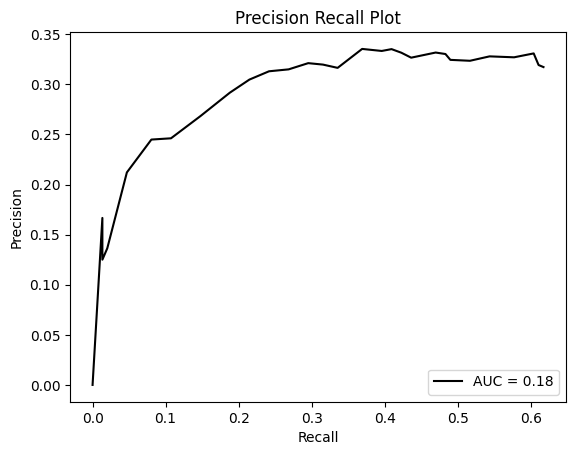

In [219]:
plt.clf()
plt.title('Precision Recall Plot')
plt.plot(recalls, precisions, 'black', label='AUC = %0.2f' % metrics.auc(recalls, precisions))
plt.legend(loc='lower right')
# plt.plot([0, 1], [0, 1], 'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.savefig("figures/open_base_pr.png", dpi=500)